In [1]:
# pandas 라이브러리를 Import하기
import pandas as pd

In [635]:
# 데이터 파일을 읽어오기
rock_samples = pd.read_csv('data/rocksamples.csv')

In [636]:
# 데이터프레임 처음과 마지막 5개행 확인하기
rock_samples.head()
rock_samples.tail()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
2224,79528,Apollo17,Breccia,Regolith,2.38,100.0
2225,79529,Apollo17,Breccia,Regolith,1.84,100.0
2226,79535,Apollo17,Breccia,Regolith,1.69,100.0
2227,79536,Apollo17,Breccia,Regolith,1.66,100.0
2228,79537,Apollo17,Breccia,Regolith,1.05,100.0


In [637]:
#rock_samples 데이터프레임 정보 확인하기
rock_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [638]:
#rock_samples 데이터프레임 행수 확인
rock_samples.shape[0]

2229

In [639]:
#rock_samples 데이터 프레임의 인덱스 확인
rock_samples.index

RangeIndex(start=0, stop=2229, step=1)

In [640]:
#rock_samples 데이터프레임 열수 확인
rock_samples.shape[1]

6

In [641]:
#rock_samples 데이터프레임의 모양 확인
rock_samples.shape

(2229, 6)

In [642]:
#rock_samples 데이터프레임의 컬럼명 확인
rock_samples.columns

Index(['ID', 'Mission', 'Type', 'Subtype', 'Weight (g)', 'Pristine (%)'], dtype='object')

In [643]:
#rock_samples 데이터프레임 컬럼들의 데이터타입 확인
rock_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [644]:
# rock_samples 데이터프레임 수치 데이터의 요약 통계 확인
rock_samples.describe()

,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


## 각 컬럼별 누락값 검사

In [645]:
# 1단계 -> rock_samples 데이터프레임에 null값이 있는지 확인
rock_samples.isnull()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2224,False,False,False,False,False,False
2225,False,False,False,False,False,False
2226,False,False,False,False,False,False
2227,False,False,False,False,False,False


In [646]:
#결측치 갯수 확인인. false:0, True:1
rock_samples.isnull().sum()


ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64

In [647]:
# 결측치가 있는 행만 출력
rock_samples[rock_samples['Subtype'].isnull()]

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


In [648]:
rock_samples.isnull().any()
# 결측치가 있는 열을 알려달라

ID              False
Mission         False
Type            False
Subtype          True
Weight (g)      False
Pristine (%)    False
dtype: bool

In [649]:
rock_samples[rock_samples.isnull().any(axis=1)]

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


In [650]:
# [memo]현재는 모델을 만들 것이라니라 null값을 채워넣지 않을 것임.

## 컬럼값 변환 : weight(g) -> weight(kg)
    

In [651]:
rock_samples.head(2)

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.8,88.36
1,10002,Apollo11,Soil,Unsieved,5629.0,93.73


In [652]:
rock_samples['Weight (g)']

0        125.80
1       5629.00
2        213.00
3         44.80
4         53.40
         ...   
2224       2.38
2225       1.84
2226       1.69
2227       1.66
2228       1.05
Name: Weight (g), Length: 2229, dtype: float64

In [653]:
# 1단계 -> 컬럼값변환 : rock_samples['Weight (g)'] -> rock_samples['Weight (kg)]
rock_samples['Weight (g)'] = rock_samples['Weight (g)'] * 0.001
rock_samples['Weight (g)']

0       0.12580
1       5.62900
2       0.21300
3       0.04480
4       0.05340
         ...   
2224    0.00238
2225    0.00184
2226    0.00169
2227    0.00166
2228    0.00105
Name: Weight (g), Length: 2229, dtype: float64

In [654]:
rock_samples.head()


,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


In [655]:
#2단계 -> 컬럼명 변환 : 'Weight(g)' -> 'Weight(kg)
rock_samples.rename(columns = {'Weight (g)' : 'Weight (kg)'}, inplace=True)


In [656]:
rock_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.12580,88.36
1,10002,Apollo11,Soil,Unsieved,5.62900,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.21300,65.56
3,10004,Apollo11,Core,Unsieved,0.04480,71.76
4,10005,Apollo11,Core,Unsieved,0.05340,40.31
...,...,...,...,...,...,...
2224,79528,Apollo17,Breccia,Regolith,0.00238,100.00
2225,79529,Apollo17,Breccia,Regolith,0.00184,100.00
2226,79535,Apollo17,Breccia,Regolith,0.00169,100.00
2227,79536,Apollo17,Breccia,Regolith,0.00166,100.00


## 아폴로 임무별 데이터 프레임 만들기 : missions

In [657]:
rock_samples['Type'].unique()

array(['Soil', 'Basalt', 'Core', 'Breccia', 'Special', 'Crustal'],
      dtype=object)

In [658]:
# Soil (토양)
# 전통적으로 식물이 자라는 자연적인 매질을 의미함. 
# 풍화된 암석 부스러기, 유기물, 물, 공기로 구성됨. 
# Basalt (현무암)
# 가장 흔한 화산암 중 하나로, 지구 표면에서 발견됨. 
# 주로 사장석과 휘석으로 이루어져 있음.
# 한국에서는 제주도 등에서 흔히 볼 수 있는 검은색 암석임.
# Core (코어)
# 지구 내부 구조로서의 코어는 지구의 중심부를 이루는 핵을 의미함.
# 대부분 용융된 철 성분으로 이루어져 있음.
# Breccia (각력암)
# 모난 자갈이나 암석 조각들이 시멘트질 물질에 의해 
# 굳어져 형성된 암석을 의미. 
# 화산 활동 시 발생하는 화산회, 화산탄 등으로 
# 구성된 화산 각력암(volcanic breccia) 등 다양한 종류가 있음.
# Special (특별한, 특수한)
# 지질학 용어로는 특정 암석이나 지질 현상을 설명할 때 
# 그 특징을 강조하기 위해 사용될 수 있음. 
# 독립적인 고유 지질학 용어는 아닙니다.
# Crustal (지각의, 지각에 관한)
# 지구의 가장 바깥 고체층인 지각(crust)과 관련된 것을 의미하는 형용사임. 
# 예를 들어, 'crustal evolution'(지각 진화), 
# 'crustal architecture'(지각 구조)와 같은 용어로 사용됨. 

In [659]:
rock_samples['Subtype'].unique()

array(['Unsieved', 'Ilmenite', 'Regolith', 'Cristobalite', 'Olivine',
       'Pigeonite', 'Fragmental', nan, 'Feldspathic', 'Unclassified',
       '2-4mm', '1-2mm', '<1mm', '4-10mm', '>10mm', 'ImpactMelt', 'KREEP',
       'Glass', 'Agglomerate', 'Unstudied', 'Cataclastic', 'Clod',
       'Anorthosite', 'unsieved', 'Plagioclase', 'fragmental',
       'unstudied', 'notstudied', 'Cataclasite', 'Troctolite', 'Norite',
       'Pristine'], dtype=object)

In [660]:
# 빈 데이터 프레임을 만들고 변수 missions에 할당한다.
missions = pd.DataFrame()
missions['Mission'] = ['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16',
       'Apollo17']
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


In [661]:
a = rock_samples.groupby('Mission')['Weight (kg)'].sum().values
a

array([ 21.55424,  34.34238,  41.83363,  75.3991 ,  92.46262, 109.44402])

In [662]:
type(missions)

pandas.core.frame.DataFrame

In [663]:
rock_samples['Weight (kg)'].unique()

array([1.258e-01, 5.629e+00, 2.130e-01, ..., 1.023e-02, 3.650e-03,
       1.840e-03], shape=(1613,))

In [664]:
#rock_samples['Mission']의 중복되지 않은 고유값들을 알아본다.
missions['Sample weight (kg)'] = [ 21.55424,  34.34238,  41.83363,  75.3991 ,  92.46262, 109.44402]

In [665]:
#위의 값들을 mission 데이터프레임의 새로운 컬럼인 mission['Mission']에 할당한다.
missions

,Mission,Sample weight (kg)
0,Apollo11,21.55424
1,Apollo12,34.34238
2,Apollo14,41.83363
3,Apollo15,75.39910
4,Apollo16,92.46262
5,Apollo17,109.44402


#### 아폴로 임무별 샘플 중량 총합

In [666]:
# rock_samples 데이터프레임의 'Mission' 컬럼을 기준으로 그룹으로 나눈다 -> groupby()
# 나누어진 그룹에서 'weight (kg)' 컬럼의 총합을 구한다 -> groupby('Mission')['weight (kg)].sum()
# 결국 아폴로 달탐사 임무별로 수집해온 암석 샘플 총중량을 구해서 새로운 변수에 할당한다. -> 이 변수는 시리즈이다.


In [667]:
# missions 데이터프레임과 sample_total_weight 시리즈를 병합한다.


In [668]:
# 컬럼명을 'Weight (kg)' 을 'Sample weight (kg)'으로 변경한다.


In [669]:
# 임무간 중량 차이 구하기

In [670]:
# 아폴로 임무간의 수집해온 암석 샘플 총중량 차이를 나타내는 컬럼 'Weight diff'를 missions 데이터프레임에 추가
missions['Weight diff'] = missions['Sample weight (kg)'].diff()
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,NaN
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [671]:
# 아폴로 11은 그 전 달탐사가 없어 NaN 값을 가지므로 결측치 0으로 채우기
missions.fillna(value=0, inplace=True)
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,0.00000
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [672]:
# 달탐사선 = 달모듈 + 명령모듈 --> 이 둘을 합쳐서 승무원 모듈
# 달 모듈의 이름, 중량 컬럼을 missions 데이터프레임에 추가
missions['Lunar module (LM)'] = 달모듈이름 = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
missions['Lunar mass (kg)'] = 달모듈중량 = [15103, 15235, 15264, 16430, 16445, 16456]
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456


In [673]:
# 아폴로 임무별로 달모듈 중량 차이를 구해서 새로운 컬럼 'LM mass diff'를 만들어서  missions 데이터프레임에 추가
missions['Lunar mass (kg)'].diff()
missions['LM mass diff'] = missions['Lunar mass (kg)'].diff()
missions.fillna(value=0, inplace=True)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


In [674]:
# 결측치가 있다면 0으로 채우기



In [675]:
#명령모듈의 이름, 중량 컬럼을 missionms 데이터프레임에 추가
missions['Command Module (CM)'] = 명령모듈이름 = ['Columbia (CSM-107]', 'Yankee Clipper (CM-100])', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
missions['Command Mass (kg)'] = 명령모듈중량 = [5560, 5609, 5758, 5875, 5840, 5960]
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960


In [676]:
#임무간 명령 모듈 중량 차이 구하기기
#아폴로 임무별로 명령모듈 중량 차이를 구해서 새로운 컬럼 'CM Mass diff'를 만들어 missions 데이터프레임에 추가
missions['Command Mass (kg)'].diff()
missions['CM mass diff'] = missions['Command Mass (kg)'].diff()
missions.fillna(value=0, inplace=True)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg),CM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0


In [677]:
# 승무원영역 = 달모듈 + 명령모듈
# 달 모듈과 명령모듈 중량을 합한 값을 'Total weight (kg)'라는 새로운 컬럼을 만들어 missions 데이터프레임에 추가

missions['Total weight (kg)'] = missions['Lunar mass (kg)'] + missions['Command Mass (kg)']

missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg),CM mass diff,Total weight (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416


In [678]:
# 승무원 영역을 나타내는 'Total weight (kg)'의 아폴로 임무별 중량 차이를 구하는 새로운 컬럼 'Total weight diff'를 missions 데이터프레임에 추가
missions['Total weight (kg) diff'] = missions['Total weight (kg)'].diff()
missions['Total weight (kg) diff'].fillna(value=0, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_40948\3697473596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missions['Total weight (kg) diff'].fillna(value=0, inplace=True)


In [679]:
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg),CM mass diff,Total weight (kg),Total weight (kg) diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0


In [680]:
# 페이로드에서 승무원 영역이 차지하는 비율 구하기 -> 'Crewed area : Payload'
saturnVPayload = 43500
missions['Crewed area : Payload'] = missions['Total weight (kg)'] / saturnVPayload
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg),CM mass diff,Total weight (kg),Total weight (kg) diff,Crewed area : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310


In [681]:
# 승무원 영역에서 암석 샘플이 차지하는 비율 구하기 -> 'Sample : Crewed area'
missions['Sample : Crewed area'] = missions['Sample weight (kg)'] / missions['Total weight (kg)']
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg),CM mass diff,Total weight (kg),Total weight (kg) diff,Crewed area : Payload,Sample : Crewed area
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882


In [682]:
# 페이로드에서 샘플이 차지하는 비율 구하기 -> 'Sample : Payload'
missions['Sample : Payload'] = missions['Sample weight (kg)'] / saturnVPayload
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),Lunar mass (kg),LM mass diff,Command Module (CM),Command Mass (kg),CM mass diff,Total weight (kg),Total weight (kg) diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043,0.000495
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648,0.000789
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990,0.000962
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380,0.001733
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149,0.002126
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882,0.002516


## artemis_mission 데이터프레임 만들기

In [683]:
artemis_crewedArea = 26520

artemis_dict = {'Mission' : ['artemis1', 'artemis1b', 'artemis2'],
                'Total weight (kg)' : [artemis_crewedArea, artemis_crewedArea, artemis_crewedArea],
                'Payload (kg)' : [26988, 37965, 42955]
               }

#딕셔너리를 데이터 프레임으로 저장하기
artemis_mission = pd.DataFrame(artemis_dict)
artemis_mission

,Mission,Total weight (kg),Payload (kg)
0,artemis1,26520,26988
1,artemis1b,26520,37965
2,artemis2,26520,42955


In [684]:
missions.columns

Index(['Mission', 'Sample weight (kg)', 'Weight diff', 'Lunar module (LM)',
       'Lunar mass (kg)', 'LM mass diff', 'Command Module (CM)',
       'Command Mass (kg)', 'CM mass diff', 'Total weight (kg)',
       'Total weight (kg) diff', 'Crewed area : Payload',
       'Sample : Crewed area', 'Sample : Payload'],
      dtype='object')

In [685]:
# missions 데이터프레임에서 'Crewed area : Payload', 'Sample : Crewed area', 'Sample : payload' 의 평균값을 구한다.
crewedArea_payload_ratio = missions['Crewed area : Payload'].mean()
sample_crewedArea_ratio = missions['Sample : Crewed area'].mean()
sample_payload_ratio = missions['Sample : Payload'].mean()


In [686]:
# missions 데이터프레임에서 'Sample weight (kg)'의 총합을 구한다.
missions['Sample weight (kg)'].sum()

np.float64(375.03598999999997)

In [687]:
#artemis_missions 데이터 프레임에 'Sample weight from total (kg)' 컬럼을 추가한다.
artemis_mission['Sample weight from total (kg)'] = artemis_mission['Total weight (kg)'] * sample_crewedArea_ratio



In [688]:
#artemis_mission 데이터프레임에 'Sample weight from payload (kg)' 컬럼을 추가한다.
artemis_mission['Sample weight from payload (kg)'] = artemis_mission['Payload (kg)'] * sample_payload_ratio


In [689]:
# artemis_mission 데이터프레임에 'Estimated sample weight (kg)' 컬럼을 추가한다.
artemis_mission['Estimated sample weight (kg)'] = (artemis_mission['Sample weight from payload (kg)'] + 
                                                   artemis_mission['Sample weight from total (kg)']) / 2
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


##아르테미스 임무에서 가져올 암석 종류 구하기

In [690]:
# rock_samples의 5개 정보 확인하기
rock_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.12580,88.36
1,10002,Apollo11,Soil,Unsieved,5.62900,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.21300,65.56
3,10004,Apollo11,Core,Unsieved,0.04480,71.76
4,10005,Apollo11,Core,Unsieved,0.05340,40.31
...,...,...,...,...,...,...
2224,79528,Apollo17,Breccia,Regolith,0.00238,100.00
2225,79529,Apollo17,Breccia,Regolith,0.00184,100.00
2226,79535,Apollo17,Breccia,Regolith,0.00169,100.00
2227,79536,Apollo17,Breccia,Regolith,0.00166,100.00


In [691]:
# rock_samples 데이터프레임에 암석샘플의 남은 양을 나타내는 'Remaining (kg)' 컬럼추가


In [692]:
# rock_samples 수치데이터 요약 통계 확인


In [693]:
# rock_samples['Weight (kg)']의 모든 값이 0.16kg 이상 인지 확인


In [694]:
# rock_samples['Weight (kg)']이 0.16kg 이상 이면서 rock_samples['Pristine (%)']이 50 이하인지 확인
low_samples = rock_samples[(rock_samples['Weight (kg)'] >= 0.16) & (rock_samples['Pristine (%)'] <= 50)]
low_samples = pd.DataFrame(low_samples)
low_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
11,10017,Apollo11,Basalt,Ilmenite,0.9730,43.71
14,10020,Apollo11,Basalt,Ilmenite,0.4250,27.88
15,10021,Apollo11,Breccia,Regolith,0.2500,30.21
29,10045,Apollo11,Basalt,Olivine,0.1850,12.13
37,10057,Apollo11,Basalt,Ilmenite,0.9190,35.15
39,10059,Apollo11,Breccia,Regolith,0.1880,36.94
52,10072,Apollo11,Basalt,Ilmenite,0.4470,15.22
59,10086,Apollo11,Soil,Unsieved,0.8230,0.01
68,12002,Apollo12,Basalt,Olivine,1.5300,49.04
69,12003,Apollo12,Soil,Unsieved,0.3000,28.52


In [695]:
#위의 두 조건을 모두 만족하는 행만 추출해서 low_samples라는 데이터 프레임을 만든다.


In [696]:
low_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 to 2183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            27 non-null     int64  
 1   Mission       27 non-null     object 
 2   Type          27 non-null     object 
 3   Subtype       27 non-null     object 
 4   Weight (kg)   27 non-null     float64
 5   Pristine (%)  27 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


In [697]:
# low_samples 데이터프레임에서 암석유형('Type')별로 개수를 센다.
low_samples['Type'].value_counts()

Type
Basalt     14
Breccia     8
Soil        4
Core        1
Name: count, dtype: int64

In [698]:
#low_samples['Type']의 값이 'Basalt'이거나 'Breccia' 인지 확인 -> isin(리스트)
low_samples['Type'].isin(['Basalt','Breccia'])

11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

In [699]:
# low_samples['Type'] 의 값이 'Basalt'이거나 'Breccia'인 행만 추출해서 needed_samples 데이터프레임 만들기
needed_samples = low_samples[low_samples['Type'].isin(['Basalt','Breccia'])]
needed_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
11,10017,Apollo11,Basalt,Ilmenite,0.9730,43.71
14,10020,Apollo11,Basalt,Ilmenite,0.4250,27.88
15,10021,Apollo11,Breccia,Regolith,0.2500,30.21
29,10045,Apollo11,Basalt,Olivine,0.1850,12.13
37,10057,Apollo11,Basalt,Ilmenite,0.9190,35.15
39,10059,Apollo11,Breccia,Regolith,0.1880,36.94
52,10072,Apollo11,Basalt,Ilmenite,0.4470,15.22
68,12002,Apollo12,Basalt,Olivine,1.5300,49.04
72,12006,Apollo12,Basalt,Olivine,0.2064,0.53
113,12047,Apollo12,Basalt,Ilmenite,0.1930,33.70


In [700]:
# needed_samples 정보확인
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 11 to 2183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            22 non-null     int64  
 1   Mission       22 non-null     object 
 2   Type          22 non-null     object 
 3   Subtype       22 non-null     object 
 4   Weight (kg)   22 non-null     float64
 5   Pristine (%)  22 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [701]:
# needed_samples 데이터프레임에서 'Type'으로 groupby해서 암석 샘플의 총중량의 합을 구한다



In [702]:
# rock_samples 데이터프레임에서 'Type'으로 groupby 해서 암석 샘플의 중량의 합을 구한다. 
#           -> 아폴로 임무에서 처음부터 수집이 안된 암석을 구한다.
rock_samples['Type'].value_counts()



Type
Breccia    959
Soil       813
Basalt     351
Core        56
Crustal     46
Special      4
Name: count, dtype: int64

In [703]:
rock_samples[rock_samples['Type'] == 'Crustal']

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
497,15361,Apollo15,Crustal,Cataclastic,0.00090,66.56
498,15362,Apollo15,Crustal,Cataclastic,0.00420,56.88
499,15363,Apollo15,Crustal,Cataclastic,0.00050,71.00
540,15415,Apollo15,Crustal,Anorthosite,0.26940,67.07
557,15437,Apollo15,Crustal,Anorthosite,0.00100,80.00
731,60057,Apollo16,Crustal,Anorthosite,0.00310,100.00
733,60059,Apollo16,Crustal,Anorthosite,0.00105,100.00
769,60619,Apollo16,Crustal,Anorthosite,0.02800,90.75
802,61017,Apollo16,Crustal,Anorthosite,0.00262,100.00
831,61226,Apollo16,Crustal,Anorthosite,0.00153,100.00


In [704]:
# rock_samples에서 'Type'이 'Crustal'. 인 행만 추출한다.
crustal = rock_samples[rock_samples['Type'] == 'Crustal']

In [705]:
# needed_samples에 crustal을 추가한다.
needed_samples = pd.concat([needed_samples, crustal])
needed_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
11,10017,Apollo11,Basalt,Ilmenite,0.97300,43.71
14,10020,Apollo11,Basalt,Ilmenite,0.42500,27.88
15,10021,Apollo11,Breccia,Regolith,0.25000,30.21
29,10045,Apollo11,Basalt,Olivine,0.18500,12.13
37,10057,Apollo11,Basalt,Ilmenite,0.91900,35.15
...,...,...,...,...,...,...
2089,78238,Apollo17,Crustal,Norite,0.00000,86.03
2092,78256,Apollo17,Crustal,Pristine,0.00000,0.00
2126,78517,Apollo17,Crustal,Cataclasite,0.00182,82.97
2130,78527,Apollo17,Crustal,Cataclasite,0.00516,82.05


In [706]:
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 11 to 2189
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            68 non-null     int64  
 1   Mission       68 non-null     object 
 2   Type          68 non-null     object 
 3   Subtype       68 non-null     object 
 4   Weight (kg)   68 non-null     float64
 5   Pristine (%)  68 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ KB


In [707]:
needed_samples.Type.unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

In [708]:
needed_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

## needed samples overview 만들기

In [709]:
## 아르테미스 임무에 전달할 최종 데이터프레임 needed_samples_overview 만든다.
needed_samples_overview = pd.DataFrame()

In [710]:
# needed samples 데이터프레임에서 중복되지 않은 암석유형을 추출한다.
needed_samples_overview['Type'] = needed_samples['Type'].unique()
needed_samples_overview

,Type
0,Basalt
1,Breccia
2,Crustal


In [711]:
# needed_samples 데이터프레임에서 암석유형별('Type') 중량 합을 구한다.
needed_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt     17.42340
Breccia    10.11850
Crustal     4.74469
Name: Weight (kg), dtype: float64

In [712]:
needed_sample_weight = needed_samples.groupby('Type')['Weight (kg)'].sum().reset_index()
needed_sample_weight

,Type,Weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [713]:
# 두 데이터프레임을 병합한다.
needed_samples_overview = pd.merge(needed_samples_overview, needed_sample_weight, on = 'Type')
needed_samples_overview

,Type,Weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [714]:
# 컬럼명을 변경 'Weight (kg)' -> 'Total weight (kg)'
needed_samples_overview.rename(columns={'Weight (kg)' : 'Total weight (kg)'}, inplace=True)
needed_samples_overview

,Type,Total weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [715]:
# needed_samples 데이터프레임에서 암석유형별 중량의 평균을 구한다.
needed_sample_ave_weight = needed_samples.groupby('Type')['Weight (kg)'].mean().reset_index()





In [716]:
# 두 데이터프레임을 병합한다.

needed_samples_overview = pd.merge(needed_samples_overview, needed_sample_ave_weight, on='Type')


In [717]:
# 컬럼명을 변경 'Weight (kg)' -> 'Average weight (kg)'
needed_samples_overview.rename(columns={'Weight (kg)' : 'Average weight (kg)'}, inplace = True)


In [718]:
needed_samples_overview

,Type,Total weight (kg),Average weight (kg)
0,Basalt,17.42340,1.244529
1,Breccia,10.11850,1.264813
2,Crustal,4.74469,0.103145


In [719]:
# rock_samples 데이터프레임에서 암석유형별('Type') 개수를 구해서 total_rock_count 라는 데이터프레임을 만든다.
total_rock_count = rock_samples.groupby('Type')['ID'].count().reset_index()
total_rock_count

,Type,ID
0,Basalt,351
1,Breccia,959
2,Core,56
3,Crustal,46
4,Soil,813
5,Special,4


In [720]:
# 두 데이터프레임을 병합한다.
needed_samples_overview = pd.merge(needed_samples_overview,total_rock_count, on='Type')
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),ID
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [721]:
# 컬럼명을 변경한다. 'ID' -> 'Number of samples'

needed_samples_overview.rename(columns={'ID' : 'Number of samples'}, inplace=True)
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [722]:
# needed_samples_overview['Number of samples'] 의 총합을 구하고 total_rocks에 할당
total_rock = needed_samples_overview['Number of samples'].sum()
total_rock

np.int64(1356)

In [723]:
# 각 암석유형별로 차지하는 비율을 구해서 'Percentage of rocks'라는 컬럼에 할당한다.
needed_samples_overview['Percentage of rocks'] = needed_samples_overview['Number of samples'] / total_rock
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks
0,Basalt,17.42340,1.244529,351,0.258850
1,Breccia,10.11850,1.264813,959,0.707227
2,Crustal,4.74469,0.103145,46,0.033923


In [724]:
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


In [725]:
# artemis_mission['Estimated sample weight (kg)']의 평균을 구해서 Artemis 달탐사의 에상 암석 중량을 구한다.
artemis_ave_weight = artemis_mission['Estimated sample weight (kg)'].mean()

In [726]:
# needed_samples_overview['Weight to collect'] 컬럼을 만든다.
needed_samples_overview['Weight to collect'] = needed_samples_overview['Percentage of rocks'] * artemis_ave_weight


In [ ]:
# 표에대한 설명을 추가된 레포트


In [727]:
# 수집할 각각의 암석 개수를 알려준다.
needed_samples_overview['Rocks to collect'] = needed_samples_overview['Weight to collect'] / needed_samples_overview['Average weight (kg)']
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect,Rocks to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267,13.231731
1,Breccia,10.11850,1.264813,959,0.707227,44.991764,35.571884
2,Crustal,4.74469,0.103145,46,0.033923,2.158103,20.922917


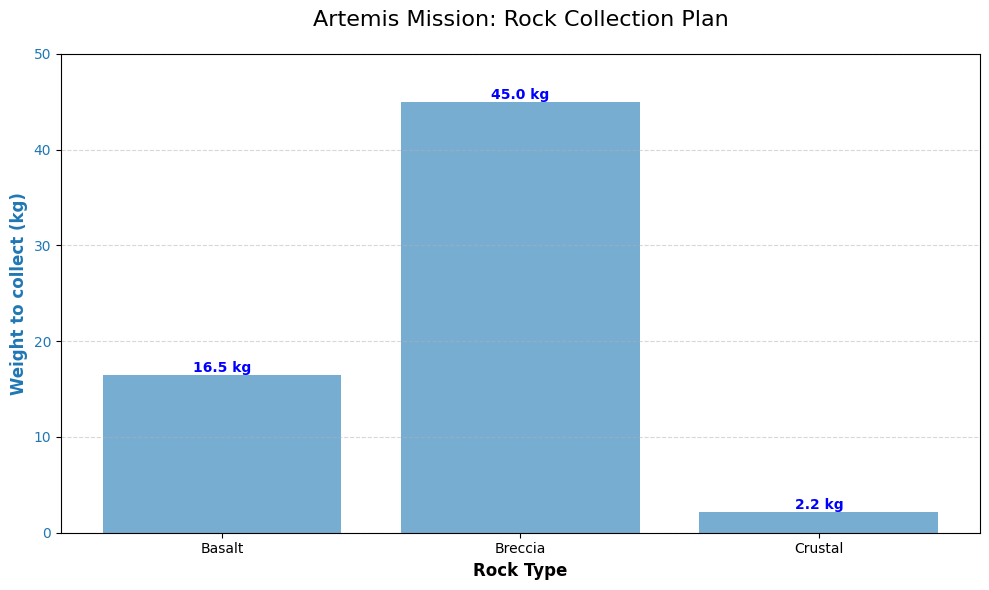

In [735]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 정의 (노트북 분석 결과값)
data = {
    'Type': ['Basalt', 'Breccia', 'Crustal'],
    'Weight to collect (kg)': [16.467267, 44.991764, 2.158103],
    'Rocks to collect (ea)': [13.231731, 35.571884, 20.922917]
}
df = pd.DataFrame(data)

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 설정 (무게)
color = 'tab:blue'
ax1.set_xlabel('Rock Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Weight to collect (kg)', color=color, fontsize=12, fontweight='bold')
bars1 = ax1.bar(df['Type'], df['Weight to collect (kg)'], color=color, alpha=0.6, label='Weight (kg)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 50)

# 텍스트 레이블 추가 (무게)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f} kg', 
             ha='center', va='bottom', color='blue', fontweight='bold')


# 텍스트 레이블 추가 (개수)
for i, txt in enumerate(df['Rocks to collect (ea)']):
    ax2.text(i, txt + 1.5, f'{int(txt)} ea', ha='center', va='bottom', color='red', fontweight='bold')

# 타이틀 및 그리드
plt.title('Artemis Mission: Rock Collection Plan', fontsize=16, pad=20)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

fig.tight_layout()
plt.savefig('artemis_rock_plan.png')

# Artemis Mission Rock Collection Plan

### 1. 수집해야할 암석

이전 아폴로 임무의 암석 샘플 활용도를 분석하였으며, 연구가치가 높고 수집이 필요한 핵심 암석 3종을 선별하였음.
1. Basalt(현무암): 달의 바다를 구성하는 대표적인 화산암.
2. Breccia(각력암): 충돌에 의해 여러 암석 조각이 섞여 굳어진 암석.
3. Crustal(지각암): 달의 원래 지각을 구성하는 암석으로, 달의 기원을 밝히는 데에 사용되는 암석.

### 2. 수집해야할 암석의 무게

수집해야 할 암석의 무게는 다음과 같음.
1. Basalt(현무암): 약 16.47kg
2. Breccia(각력암): 약 44.99kg
3. Crustal(지각암): 약 2.1kg

총 목표 무게: 약 63.6kg

### 3. 수집해야할 암석의 갯수

각 암석의 무게와 밀도를 고려하였을 떄, 목표 무게를 달성하기 위한 예상 수집 갯수는 다음과 같음
수집해야 할 암석의 무게는 다음과 같음.
1. Basalt(현무암): 약 13개
2. Breccia(각력암): 약 35개
3. Crustal(지각암): 약 20개

### 4. 근거

본 계획은 다음과 같은 분석을 기반으로 수립됨.
1. 가치평가: 이전 아폴로 임무에서 채집한 샘플 중 연구에 많이 사용되어 채집대비 보존율이 낮은 암석을 필요한 샘플로 지정함. 하지만 Crustal(지각암)은 드물고 중요한 연구자원으로 판단하여 포함하였음.
2. 비율산정: 위 기준에 부합하는 샘플의 유형별 분포 비율을 계산하여 이를 아르테미스 미션의 수집 비율로 지정함.
3. 수집용량예측: 아르테미스 로켓의 페이로드 능력과 승무원 모듈 비율을 아폴로 임무와 비교 분석해, 이번 임무에서 가져올 수 있는 암석의 무게를 추산함.